In [18]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize
import pandas as pd
from scipy.optimize import curve_fit

In [19]:
# stehende Mikrowellen
V1_1 = pd.read_csv('./19_Mikrowellen/V1_1.csv', sep = ',', skipinitialspace = True)

V1_1_x = V1_1['pos'].str.strip(' ').drop(index = 0).dropna(axis = 'index').to_numpy().astype(float)
V1_1_E = V1_1['E'].str.strip(' ').drop(index = 0).dropna(axis = 'index').to_numpy().astype(float)


# Lecherleitung
V1_3 = pd.read_csv('./19_Mikrowellen/V1_3.csv', sep = ',', skipinitialspace = True)

V1_3_x = V1_3['pos'].str.strip(' ').drop(index = 0).dropna(axis = 'index').to_numpy().astype(float)
V1_3_E = V1_3['E'].str.strip().drop(index = 0).dropna(axis = 'index').to_numpy().astype(float)


# curve_fit
def E(x, E0, k, a, m, b):
    return 2*E0*abs(np.sin(k*x - a))+m*x+b

In [20]:
# Bestimmung der Fitparameter
popt_1_1, pcov_1_1 = curve_fit(E, V1_1_x, V1_1_E, bounds = ([4.1, 0., 0., -1, 0], [6., 0.4, 100., 1, 2]))
popt_1_3, pcov_1_3 = curve_fit(E, V1_3_x, V1_3_E, bounds = ([1, 0., 0., -1, 0], [2, 0.4, 100., 1, 2]))

popt_1_1, popt_1_3, pcov_1_1, pcov_1_3

(array([ 4.46604497e+00,  1.98351247e-01,  4.98444468e+01, -1.48831621e-02,
         5.82370841e-01]),
 array([ 1.00000000e+00,  1.95722220e-01,  5.01107573e+01, -7.90459617e-03,
         2.00000000e+00]),
 array([[ 4.45212563e-02,  1.96346623e-05,  2.31175005e-03,
          2.30978941e-04, -8.31342974e-02],
        [ 1.96346623e-05,  4.66827673e-07,  5.22764031e-05,
          3.17334992e-07, -6.17943828e-05],
        [ 2.31175005e-03,  5.22764031e-05,  6.21184962e-03,
          3.69719350e-05, -7.39122882e-03],
        [ 2.30978941e-04,  3.17334992e-07,  3.69719350e-05,
          1.65054423e-05, -2.06861588e-03],
        [-8.31342974e-02, -6.17943828e-05, -7.39122882e-03,
         -2.06861588e-03,  3.44257815e-01]]),
 array([[ 6.14318099e-03,  2.54745135e-06, -3.35555965e-04,
         -1.52824347e-06, -7.78108073e-03],
        [ 2.54745135e-06,  2.23453689e-07,  2.72761418e-05,
         -5.46133197e-08,  3.10198050e-06],
        [-3.35555965e-04,  2.72761418e-05,  4.53878677e-03,
    

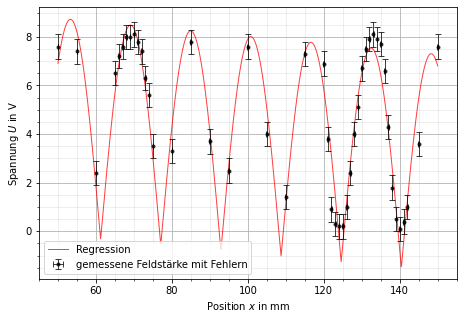

In [21]:
fig, ax = plt.subplots(figsize=(7.5,5))

xplot_1_1 = np.linspace(min(V1_1_x), max(V1_1_x), 1000)
#print(E(xplot_1_1, *popt_1_1))

#ax.set_title(r'Korrigierte Steigungen $mr^2$ für variierte Kugelradien')  
ax.set_xlabel(r'Position $x$ in mm')
ax.set_ylabel(r'Spannung $U$ in V')
ax.grid()
ax.grid(which='minor', color='#999999', alpha=0.2, linestyle='-')
ax.minorticks_on()
ax.plot(xplot_1_1, E(xplot_1_1, *popt_1_1), color = 'red', alpha = 0.75, linewidth = 1, label = 'Regression')
ax.errorbar(V1_1_x, V1_1_E, xerr = 0.1, yerr = 0.5, fmt = '.', color = 'black', alpha = 0.75, linewidth=1, ecolor="black", capsize=3, label = 'gemessene Feldstärke mit Fehlern')
ax.legend()
ax.legend(loc="lower left")
plt.savefig('./19_Mikrowellen/V1_1.pgf', facecolor = 'white', bbox_inches='tight')
plt.show()

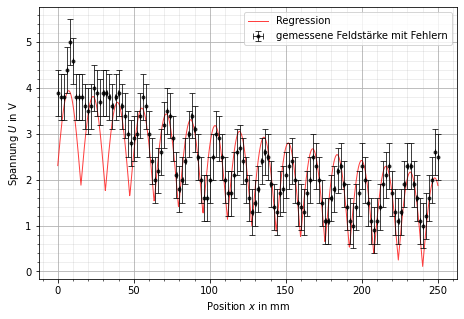

In [22]:
fig, ax = plt.subplots(figsize=(7.5,5))

xplot_1_3 = np.linspace(min(V1_3_x), max(V1_3_x), 1000)

#ax.set_title(r'Korrigierte Steigungen $mr^2$ für variierte Kugelradien')  
ax.set_xlabel(r'Position $x$ in mm')
ax.set_ylabel(r'Spannung $U$ in V')
ax.grid()
ax.grid(which='minor', color='#999999', alpha=0.2, linestyle='-')
ax.minorticks_on()
ax.plot(xplot_1_3, E(xplot_1_3, *popt_1_3), color = 'red', alpha = 0.75, linewidth = 1, label = 'Regression')
ax.errorbar(V1_3_x, V1_3_E, xerr = 0.1, yerr = 0.5, fmt = '.', color = 'black', alpha = 0.75, linewidth=1, ecolor="black", capsize=3, label = 'gemessene Feldstärke mit Fehlern')
ax.legend()
ax.legend(loc="upper right")
plt.savefig('./19_Mikrowellen/V1_3.pgf', facecolor = 'white', bbox_inches='tight')
plt.show()